<a href="https://colab.research.google.com/github/adrianriverar/Simulacion-II/blob/main/serpEscaleras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Serpientes y escaleras

### Creando el tablero

In [18]:
import numpy as np

Ingresamos el número $n$ de filas (*n_row*) y $m$ de columnas (*n_col*) que tendrá nuestro tablero de tamaño $n\times m$.



In [19]:
n_row = 5
n_col = 4 

Ingresamos de dónde a dónde estarán nuestras escaleras y serpientes.

***Nota:*** Cada escalera o serpiente deberá de ser ingresada dentro de una lista de forma ascendente y descendente respectivamente, y el conjunto de cada uno de estos en una lista de listas (matriz).



```
escaleras =  [[casilla de inicio, casilla de término], ..., [casilla de inicio, casilla de término]]

serpientes =  [[casilla de inicio, casilla de término], ..., [casilla de inicio, casilla de término]]
```



In [13]:
stairs = [[3, 11], [15, 19]]
snakes = [[13, 4], [17, 10]]

Imprimimos nuestro tablero de juego para visualizar mejor lo que está ocurriendo.

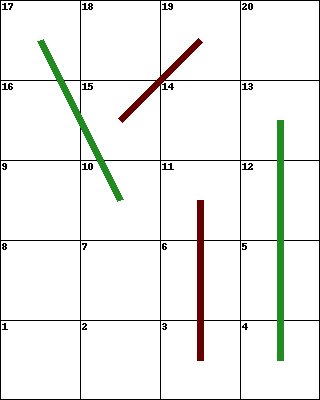

In [21]:
size_ver = 400    # Tamaño vertical en pixeles del tablero.

from PIL import Image, ImageDraw

size_hor = round(size_ver * n_col/n_row)
col_spawn = round(size_hor/n_col)
row_spawn = round(size_ver/n_row)

board = Image.new('RGB', (size_hor, size_ver), (255, 255, 255))    # Generando tablero blanco.
draw = ImageDraw.Draw(board)                                       # Creando objeto para poder dibujar el tablero.

# Dibujando líneas verticales.
bias = 0
for i in range(n_col + 1):
  if i == n_col:
    bias = 1
  draw.line([(i * col_spawn - bias, - bias), (i * col_spawn - bias, size_ver - bias)], fill = 0)

# Dibujando líneas horizontales.
bias = 0
for i in range(n_row + 1):
  if i == n_row:
    bias = 1
  draw.line([(- bias, i * row_spawn - bias), (size_hor - bias, i * row_spawn - bias)], fill = 0)  

# Dibujando números de cada casilla.
bias = 1
counter = 0
for i in range(n_row):
  if i % 2 == 0:
    for j in range(n_col):
      counter += 1
      draw.text((j * col_spawn + bias + 1, (n_row - 1 - i) * row_spawn + bias), str(counter), fill = 0)
  else:
    for j in range(n_col-1, -1, -1):
      counter += 1
      draw.text((j * col_spawn + bias + 1, (n_row - 1 - i) * row_spawn + bias), str(counter), fill = 0)

# Función para almacenar las coordenadas del centro de cada casilla en una lista.
def coordinates(mtr):
  stroke = []
  for arr in mtr:
    coor = []
    for square in arr:
      flag = 0
      for i in range(n_row):
        if flag == square:
          break
        y = (n_row - i - 0.5) * row_spawn
        if i % 2 == 0:
          for j in range(n_col):
            x = (j + 0.5) * col_spawn
            flag += 1
            if flag == square:
              break
        else:
          for j in range(n_col-1, -1, -1):
            x = (j + 0.5) * col_spawn
            flag += 1
            if flag == square:
              break
      coor.append((x, y))
    stroke.append(coor)
  return stroke
    
# Dibujando serpientes y escaleras.
stair_strokes = coordinates(stairs)
for stair in stair_strokes:
  draw.line(stair, fill = 100, width = 7)

snake_strokes = coordinates(snakes)
for snake in snake_strokes:
  draw.line(snake, fill = (34,139,34), width = 7)

# Imprimiendo tablero de juego completo.
board.show()



### Creando matriz estocástica

Ahora creamos nuestra matriz estocástica que modelará nuestro juego de serpientes y escaleras. 

El estado final (la casilla ganadora, la 20) es un estado absorbente ya que, al ya haber ganado, no hay forma de "salir" de esa casilla.

$$ \begin{equation} P =
\begin{pmatrix}
0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/2 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 5/6 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{pmatrix}
\end{equation} $$


In [22]:
# Creando matriz de ceros de n x m.
n_squares = n_row * n_col
M = [[0]*n_squares for _ in range(n_squares)]

# Distribuímos las respectivas probabilidades para cada cambio de estado.
for i in range(n_squares):
  for j in range(n_squares):
    if j >= (i + 1) and j <= (i + 6):
      M[i][j] = 1 / 6
    if (i + 6) >= n_squares:
      rest = i + 6 - n_squares + 1
      M[i][n_squares - 1] = (rest + 1) / 6
    if M[i][j] > 1:
      M[i][j] = 1

# Colocamos las respectivas distribuciones de probabilidad que representa cada escalera.
for stair in stairs:
  M[stair[0] - 1] = [0]*n_squares
  M[stair[0] - 1][stair[1] - 1] = 1

# Colocamos las respectivas distribuciones de probabilidad que representa cada serpiente.
for snake in snakes:
  M[snake[0] - 1] = [0]*n_squares
  M[snake[0] - 1][snake[1] - 1] = 1

M = np.array(M)

### Forma canónica de una matriz estocástica

Consideremos cualquier cadena de Markov arbitraria. Reubicamos los estados para poner los transitorios primero. Si hay $r$ estados absorbentes y $t$ transitorios, la matriz de probabilidades de transición tendrá la siguiente forma canónica:

$$ \begin{equation} P =
\begin{pmatrix}
Q & R \\
0 & I
\end{pmatrix}
\end{equation} $$

Aquí $I$ es la matriz identidad de orden $r$, $0$ es una matriz nula $r\times t$, $R$ es una matriz $t\times r$ y $Q$ es una matriz $t\times t$.

Partiendo de nuestra matriz de transición $P$, se sigue que

$$ \begin{equation} Q_{t\times t} =
\begin{pmatrix}
0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\
0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{pmatrix}
\end{equation} $$


$$ \begin{equation} R_{t\times r} =
\begin{pmatrix}
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
1/6 \\
0 \\
1/2 \\
0 \\
5/6 \\
1
\end{pmatrix}
\end{equation} $$

$$ \begin{equation} 0_{r\times t} =
\begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0
\end{pmatrix}
\end{equation} $$

$$ \begin{equation} I_{r\times r} =
\begin{pmatrix}
1
\end{pmatrix}
\end{equation} $$

### Matriz fundamental

Está definida como

$ N = (I - Q)^{-1} $

Ahora enunciamos.

**Teorema 1.** Dada una cadena que empieza en el estado $s_i$, denotamos por $t_i$ el tiempo promedio del número de pasos antes de que la cadena sea absorbida (i.e., el tiempo medio de absorción de todas las posibles realizaciones de una cadena que empieza en $s_i$).
$t_i$ se obtiene sumando todos los elementos de la fila $i$-ésima de la matriz fundamental del proceso.

Por lo tanto, calculamos $t_1$.

In [23]:
Q = np.delete(np.delete(M, n_squares - 1, axis = 1), n_squares - 1, axis = 0)
N = np.linalg.inv(np.eye(n_squares - 1) - Q)
sum_vec = np.sum(N, axis = 1)
print(sum_vec[0])

8.291379520352613


En conclusión, el número promedio $t_i$ de tiros del dado para ganar el juego es igual a $8.3$.